# Introduction
This is the third Dataset from Turing's test on Data Analysis. This notebook is simply a guide on some questions that could be asked on the dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/turing/covid_data.csv
/kaggle/input/turing/cardio_base.csv
/kaggle/input/turing/cardio_alco.csv


In [2]:
df = pd.read_csv(r"/kaggle/input/turing/covid_data.csv")
df.set_index(df.date, inplace=True)
df['month'] = pd.to_datetime(df.date).dt.month_name()
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,month
date,,,,,,,,,
2019-12-31,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5,December
2020-01-01,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5,January
2020-01-02,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5,January
2020-01-03,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5,January
2020-01-04,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5,January
...,...,...,...,...,...,...,...,...,...
2020-02-28,International,2020-02-28,0,0,NaN,NaN,NaN,NaN,February
2020-02-29,International,2020-02-29,0,2,NaN,NaN,NaN,NaN,February
2020-03-01,International,2020-03-01,0,0,NaN,NaN,NaN,NaN,March


# Question and Answers
## Question 1: On which day in the month of March did the difference in cases between Italy and Germany exceed 10,000?

In [3]:
#displays only Germany and Italy:
i_and_g= pd.concat([df[df.location == 'Germany' ], df[df.location == 'Italy']])

#Display only data in Germany and Italy between 2020-02-28 and 2020-03-20:
i_and_g = i_and_g[(i_and_g.date > '2020-02-27') & (i_and_g.date < '2020-03-21')]

cum_ger= i_and_g[i_and_g.location == 'Germany'].new_cases.cumsum()

cum_ity = i_and_g[i_and_g.location == 'Italy'].new_cases.cumsum()

i_and_g['country_cummulative'] = pd.concat([cum_ger,cum_ity])
i_and_g

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,month,country_cummulative
date,,,,,,,,,,
2020-02-28,Germany,2020-02-28,26,0,83783945.0,21.453,45229.245,8.00,February,26
2020-02-29,Germany,2020-02-29,10,0,83783945.0,21.453,45229.245,8.00,February,36
2020-03-01,Germany,2020-03-01,54,0,83783945.0,21.453,45229.245,8.00,March,90
2020-03-02,Germany,2020-03-02,18,0,83783945.0,21.453,45229.245,8.00,March,108
2020-03-03,Germany,2020-03-03,28,0,83783945.0,21.453,45229.245,8.00,March,136
2020-03-04,Germany,2020-03-04,39,0,83783945.0,21.453,45229.245,8.00,March,175
2020-03-05,Germany,2020-03-05,66,0,83783945.0,21.453,45229.245,8.00,March,241
2020-03-06,Germany,2020-03-06,138,0,83783945.0,21.453,45229.245,8.00,March,379
2020-03-07,Germany,2020-03-07,284,0,83783945.0,21.453,45229.245,8.00,March,663


In [4]:

k = pd.merge(cum_ity, cum_ger, on= 'date')
k.columns =['cum_ity', 'cum_ger']
dif = k[abs(k.cum_ger-k.cum_ity)>10000].index.min()
print(f'Answer 1: The day where the absolute difference in cummulative cases between Italy and Germany exceeded 10,000 cases was on {dif}')

Answer 1: The day where the absolute difference in cummulative cases between Italy and Germany exceeded 10,000 cases was on 2020-03-12


## Question 2: Look at the cummulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit the exponential function (y=Ae^(Bx)) to this set to express cummulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Answer 2: The difference between the exponential curve and the total number of real cases on 2020-03-20 = 1712


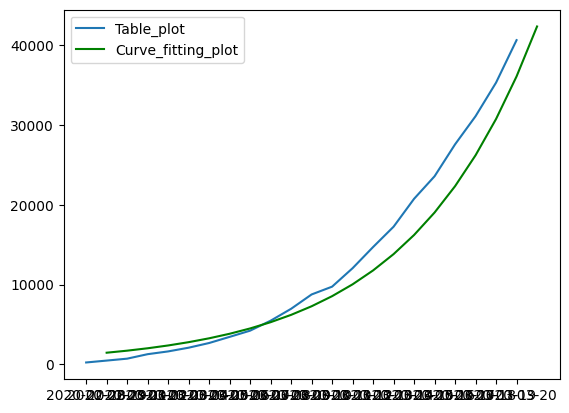

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

italy = i_and_g[i_and_g.location == 'Italy']
plt.plot(italy.date, italy.country_cummulative)

def expo (x, a, b):
    y = a*np.exp(b*x)
    return y

date_rep = np.arange(1,23)

parameter, covariance = curve_fit(expo, date_rep, italy.country_cummulative)
plt.plot(date_rep, expo(date_rep,parameter[0],parameter[1]), 'g-')
plt.legend(['Table_plot', 'Curve_fitting_plot'])

difference = expo(date_rep,parameter[0],parameter[1]).max() - italy.country_cummulative.max()
print(f'Answer 2: The difference between the exponential curve and the total number of real cases on 2020-03-20 = {difference.round().astype(int)}')

## Question 3: What is the percentage of the total number of countries that have gdp greater than 10,000dollars and hospital beds per thousand greater than five?

In [6]:

hos_df = df[(df.hospital_beds_per_thousand>5) & (df.gdp_per_capita >10000)]
no_of_countries = df['location'].unique()
no_of_countries = np.delete(no_of_countries, [-1,-2])
pert = hos_df.location.nunique() / no_of_countries.shape[0] * 100
print(f'Answer 3: The percentage of the total number of countries that have gdp greater than $10,000 and hospital beds per thousand greater than five is {round(pert, 2)}%')

Answer 3: The percentage of the total number of countries that have gdp greater than $10,000 and hospital beds per thousand greater than five is 10.48%


## Question 4: Which country is the 3rd highest  in terms of death rate? (drop all rows in the table with incomplete entries)

Answer 4: The 3rd highest country in terms of death rate is Spain 

location
Belgium           829.967102
United Kingdom    602.230174
Spain             580.389818
Italy             563.049467
Sweden            467.063461
Name: death_rate, dtype: float64


Text(0.5, 1.0, 'Top 10 countries with the highest death rate')

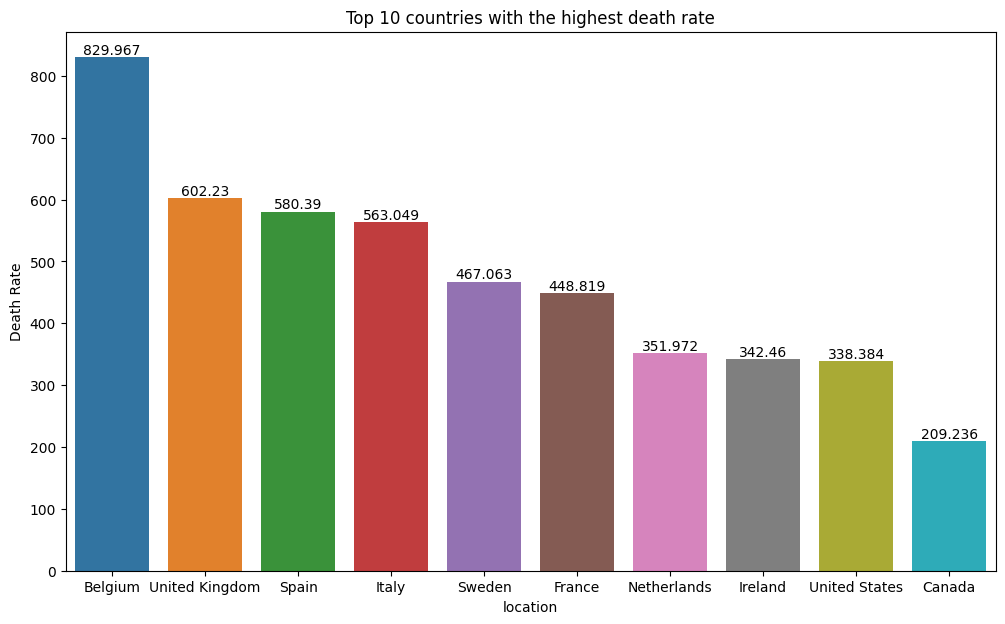

In [7]:
from pprint import pprint


#ft = df.groupby('location')[['new_cases','new_deaths']].sum()
df['death_rate'] = df.new_deaths / df.population *1000000
df2 = df.dropna()
ranki = df2.groupby('location').death_rate.sum().sort_values(ascending=False)
print(f'Answer 4: The 3rd highest country in terms of death rate is {ranki.index[2]} \n')
print(ranki.head())
plt.figure(figsize=(12,7))
dr = sns.barplot(x=ranki.index[:10], y=ranki.values[:10])
dr.bar_label(dr.containers[0])
plt.ylabel('Death Rate')
plt.title('Top 10 countries with the highest death rate')

## Question 5: What country  has the highest death rate, where percentage of its population aged 65 is above 20%? 

Answer 5: The country with the highest death rate, where percentage of its population aged 65 is above 20% is Italy 

location
Italy       563.049467
Portugal    146.321749
Germany     104.184638
Finland      58.476176
Bulgaria     24.034154
Greece       17.557231
Japan         7.266174
Name: death_rate, dtype: float64


Text(0.5, 1.0, 'Countries with the highest death rate, where percentage of its population aged 65 is above 20%')

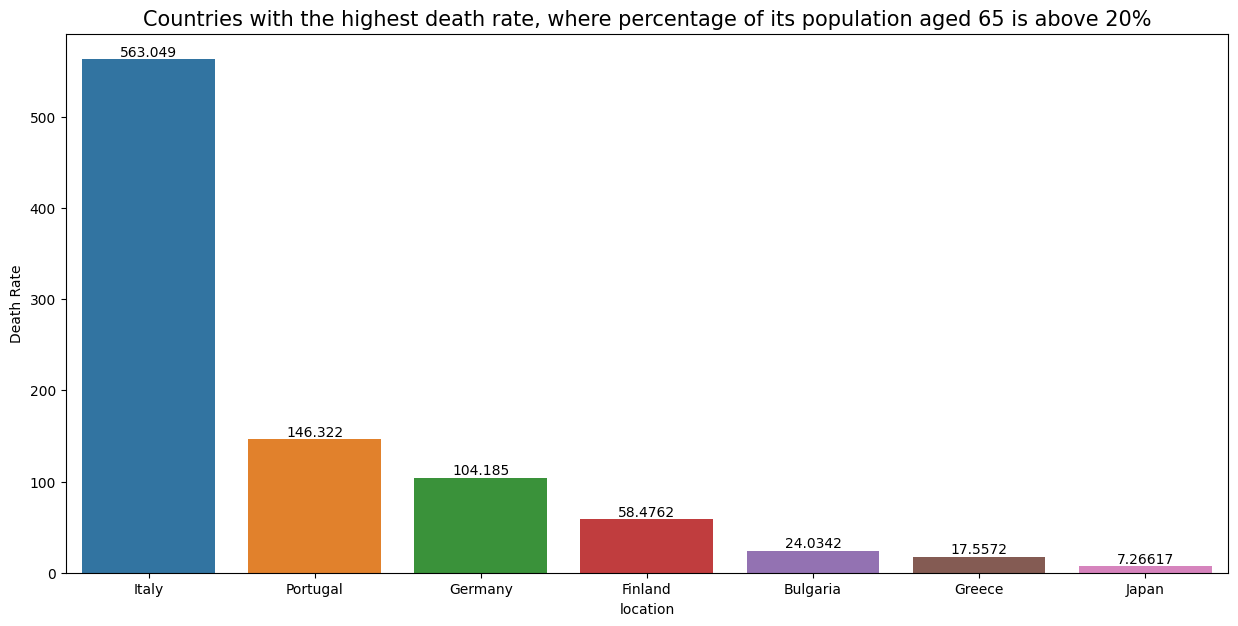

In [8]:

old_df = df2[df2.aged_65_older_percent >20]
ranki2 = old_df.groupby('location').death_rate.sum().sort_values(ascending=False)

print(f'Answer 5: The country with the highest death rate, where percentage of its population aged 65 is above 20% is {ranki2.index[0]} \n')
print(ranki2)
plt.figure(figsize=(15,7))
tc = sns.barplot(x=ranki2.index[:10], y=ranki2.values[:10])
plt.ylabel('Death Rate')

plt.bar_label(tc.containers[0])
plt.title('Countries with the highest death rate, where percentage of its population aged 65 is above 20%',size=15)


# Additional Analysis

,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,death
location,,,,,
Belgium,11589616.0,18.571,42658.576,5.64,829.967102
United Kingdom,67886004.0,18.517,39753.244,2.54,602.230174
Spain,46754783.0,19.436,34272.360,2.97,580.389818
Italy,60461828.0,23.021,35220.084,3.18,563.049467
Sweden,10099270.0,19.985,46949.283,2.22,467.063461
...,...,...,...,...,...
Vietnam,97338583.0,7.150,6171.884,2.60,0.000000
Saint Vincent and the Grenadines,110947.0,7.724,10727.146,2.60,0.000000
Laos,7275556.0,4.029,6397.360,1.50,0.000000


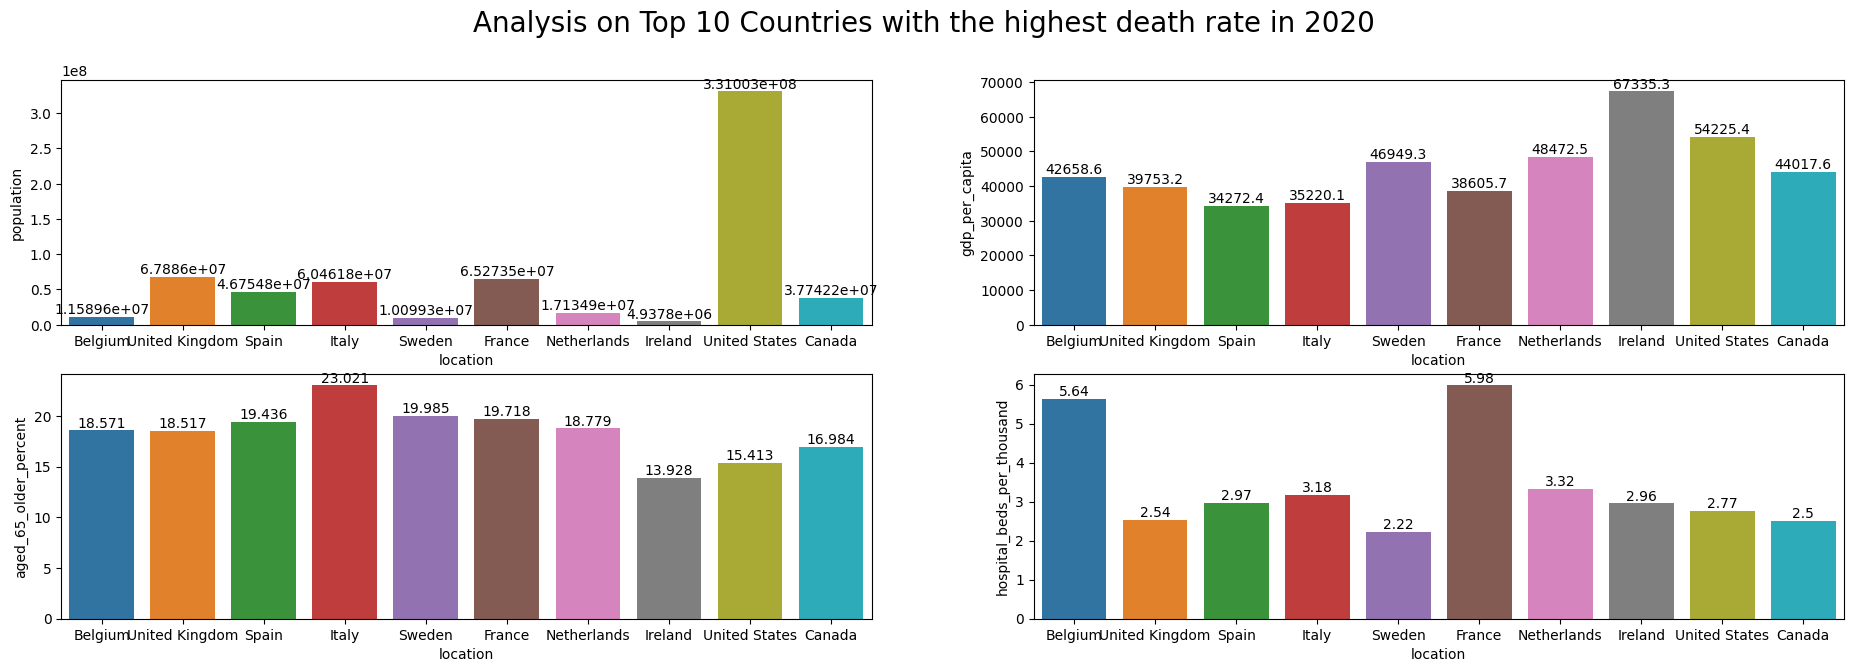

In [9]:
colu = ['population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']
df3 = df2.groupby('location')[colu].mean()
df3['death'] = ranki
df3 = df3.sort_values(ascending=False, by='death')
fig, axes = plt.subplots(2,2, figsize=(23,7))

for f in colu:
    num = colu.index(f)
    drw = sns.barplot(x=df3.index[:10], y=df3[f][:10], ax=axes[num%2, num//2])
    drw.bar_label(drw.containers[0])
    plt.suptitle("Analysis on Top 10 Countries with the highest death rate in 2020", size=20)
df3

Top Ten(10) Countries Case and Death in 2020 
                 new_cases  new_deaths
location                             
United States     1979850      112006
Brazil             739503       38406
Russia             485253        6141
United Kingdom     289140       40883
India              276583        7745
Spain              241966       27136
Italy              235561       34043
Peru               203736        5738
Germany            184861        8729
Iran               175927        8425


Text(0.5, 1.0, 'Top 10 number of deaths in countries, 2020')

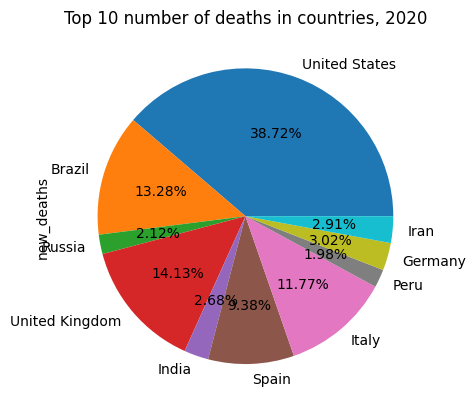

In [10]:
df4 = df2.groupby('location')[['new_cases', 'new_deaths']].sum().sort_values(ascending=False, by='new_cases' )
df4 = df4[df4.index != 'World'][:10]
df4['new_deaths'].plot(kind='pie', autopct='%1.2f%%', subplots=True)
print("Top Ten(10) Countries Case and Death in 2020 \n", df4)
plt.title("Top 10 number of deaths in countries, 2020")

Top number of cases and deaths in United States across each month, 2020
           new_cases  new_deaths
month                          
December          0           0
January           6           0
February         60           0
March        164554        3170
June         209466        8225
May          730475       42815
April        875289       57796
Top number of cases and deaths in Brazil across each month, 2020
           new_cases  new_deaths
month                          
December          0           0
January           0           0
February          1           0
March          4578         159
April         73583        5307
June         241063        9572
May          420278       23368
Top number of cases and deaths in Russia across each month, 2020
           new_cases  new_deaths
month                          
December          0           0
January           0           0
February          2           0
March          1834          10
June          88678        

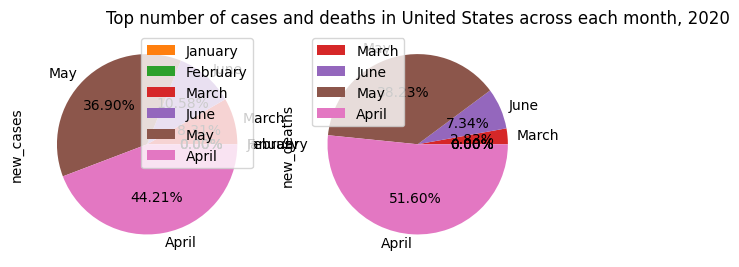

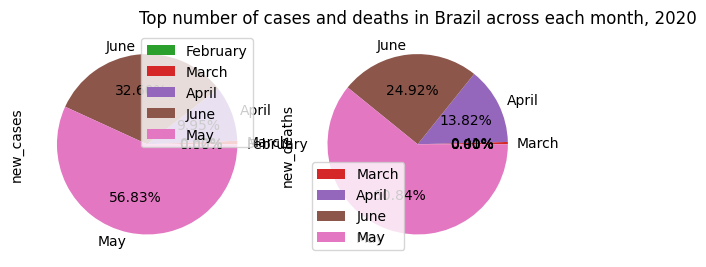

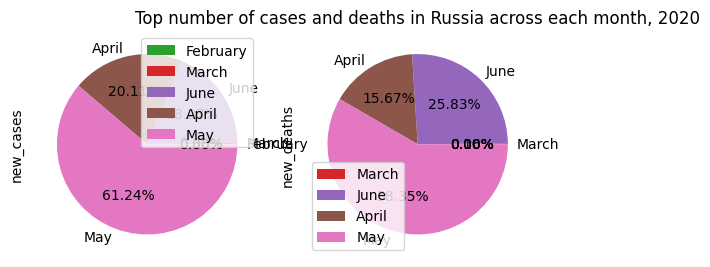

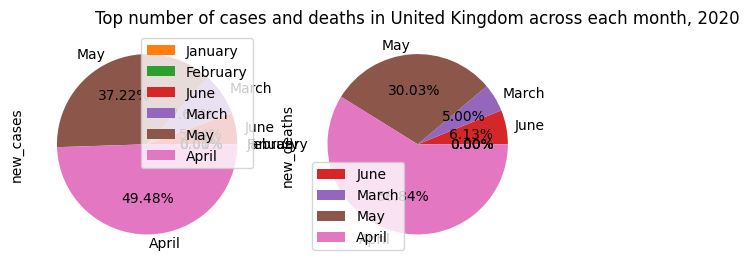

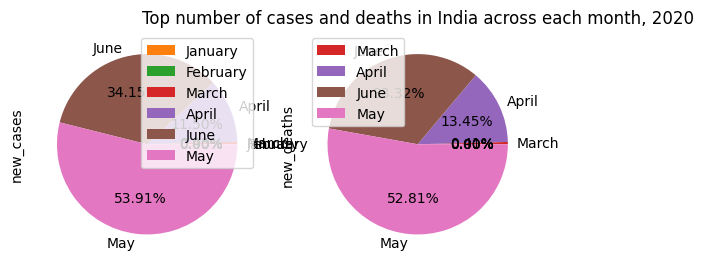

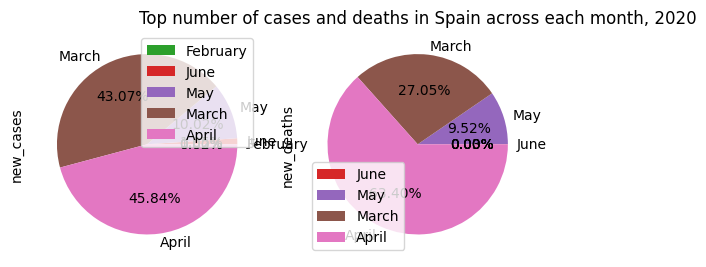

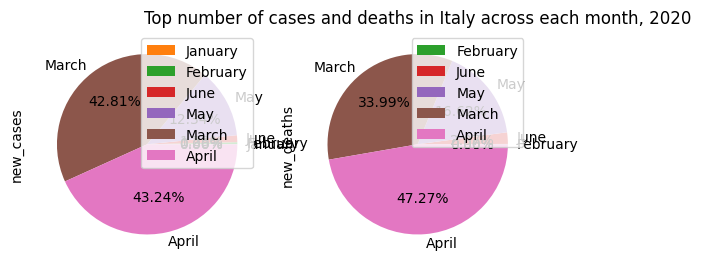

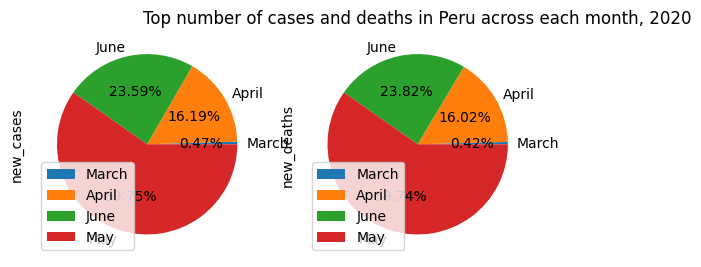

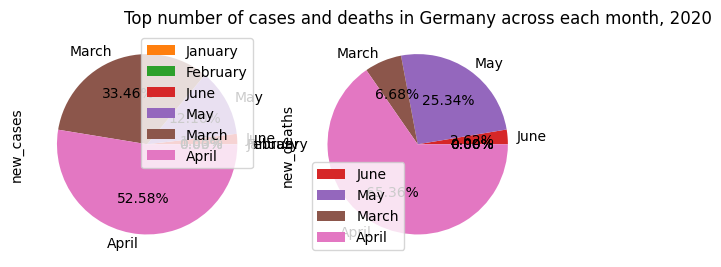

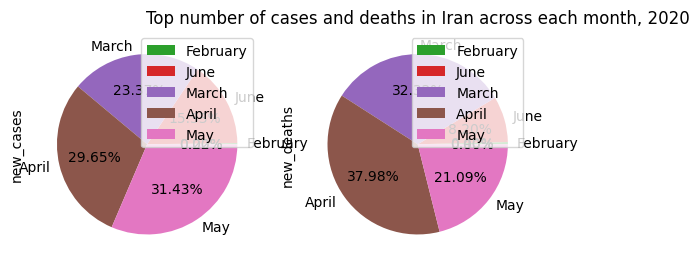

In [11]:
toppie = ['United States', 'Brazil', 'Russia', 'United Kingdom', 'India', 'Spain', 'Italy', 'Peru', 'Germany', 'Iran']

for l in toppie:
    us_ft = df2[df2.location == l].groupby('month')[['new_cases', 'new_deaths']].sum().sort_values(by='new_cases')
    us_ft.plot(kind='pie', autopct='%1.2f%%', subplots=True)
    print(f"Top number of cases and deaths in {l} across each month, 2020\n",us_ft)
    plt.title(f"Top number of cases and deaths in {l} across each month, 2020")

Text(0.5, 0.98, 'Top 10 number of cases in each country across each month, 2020')

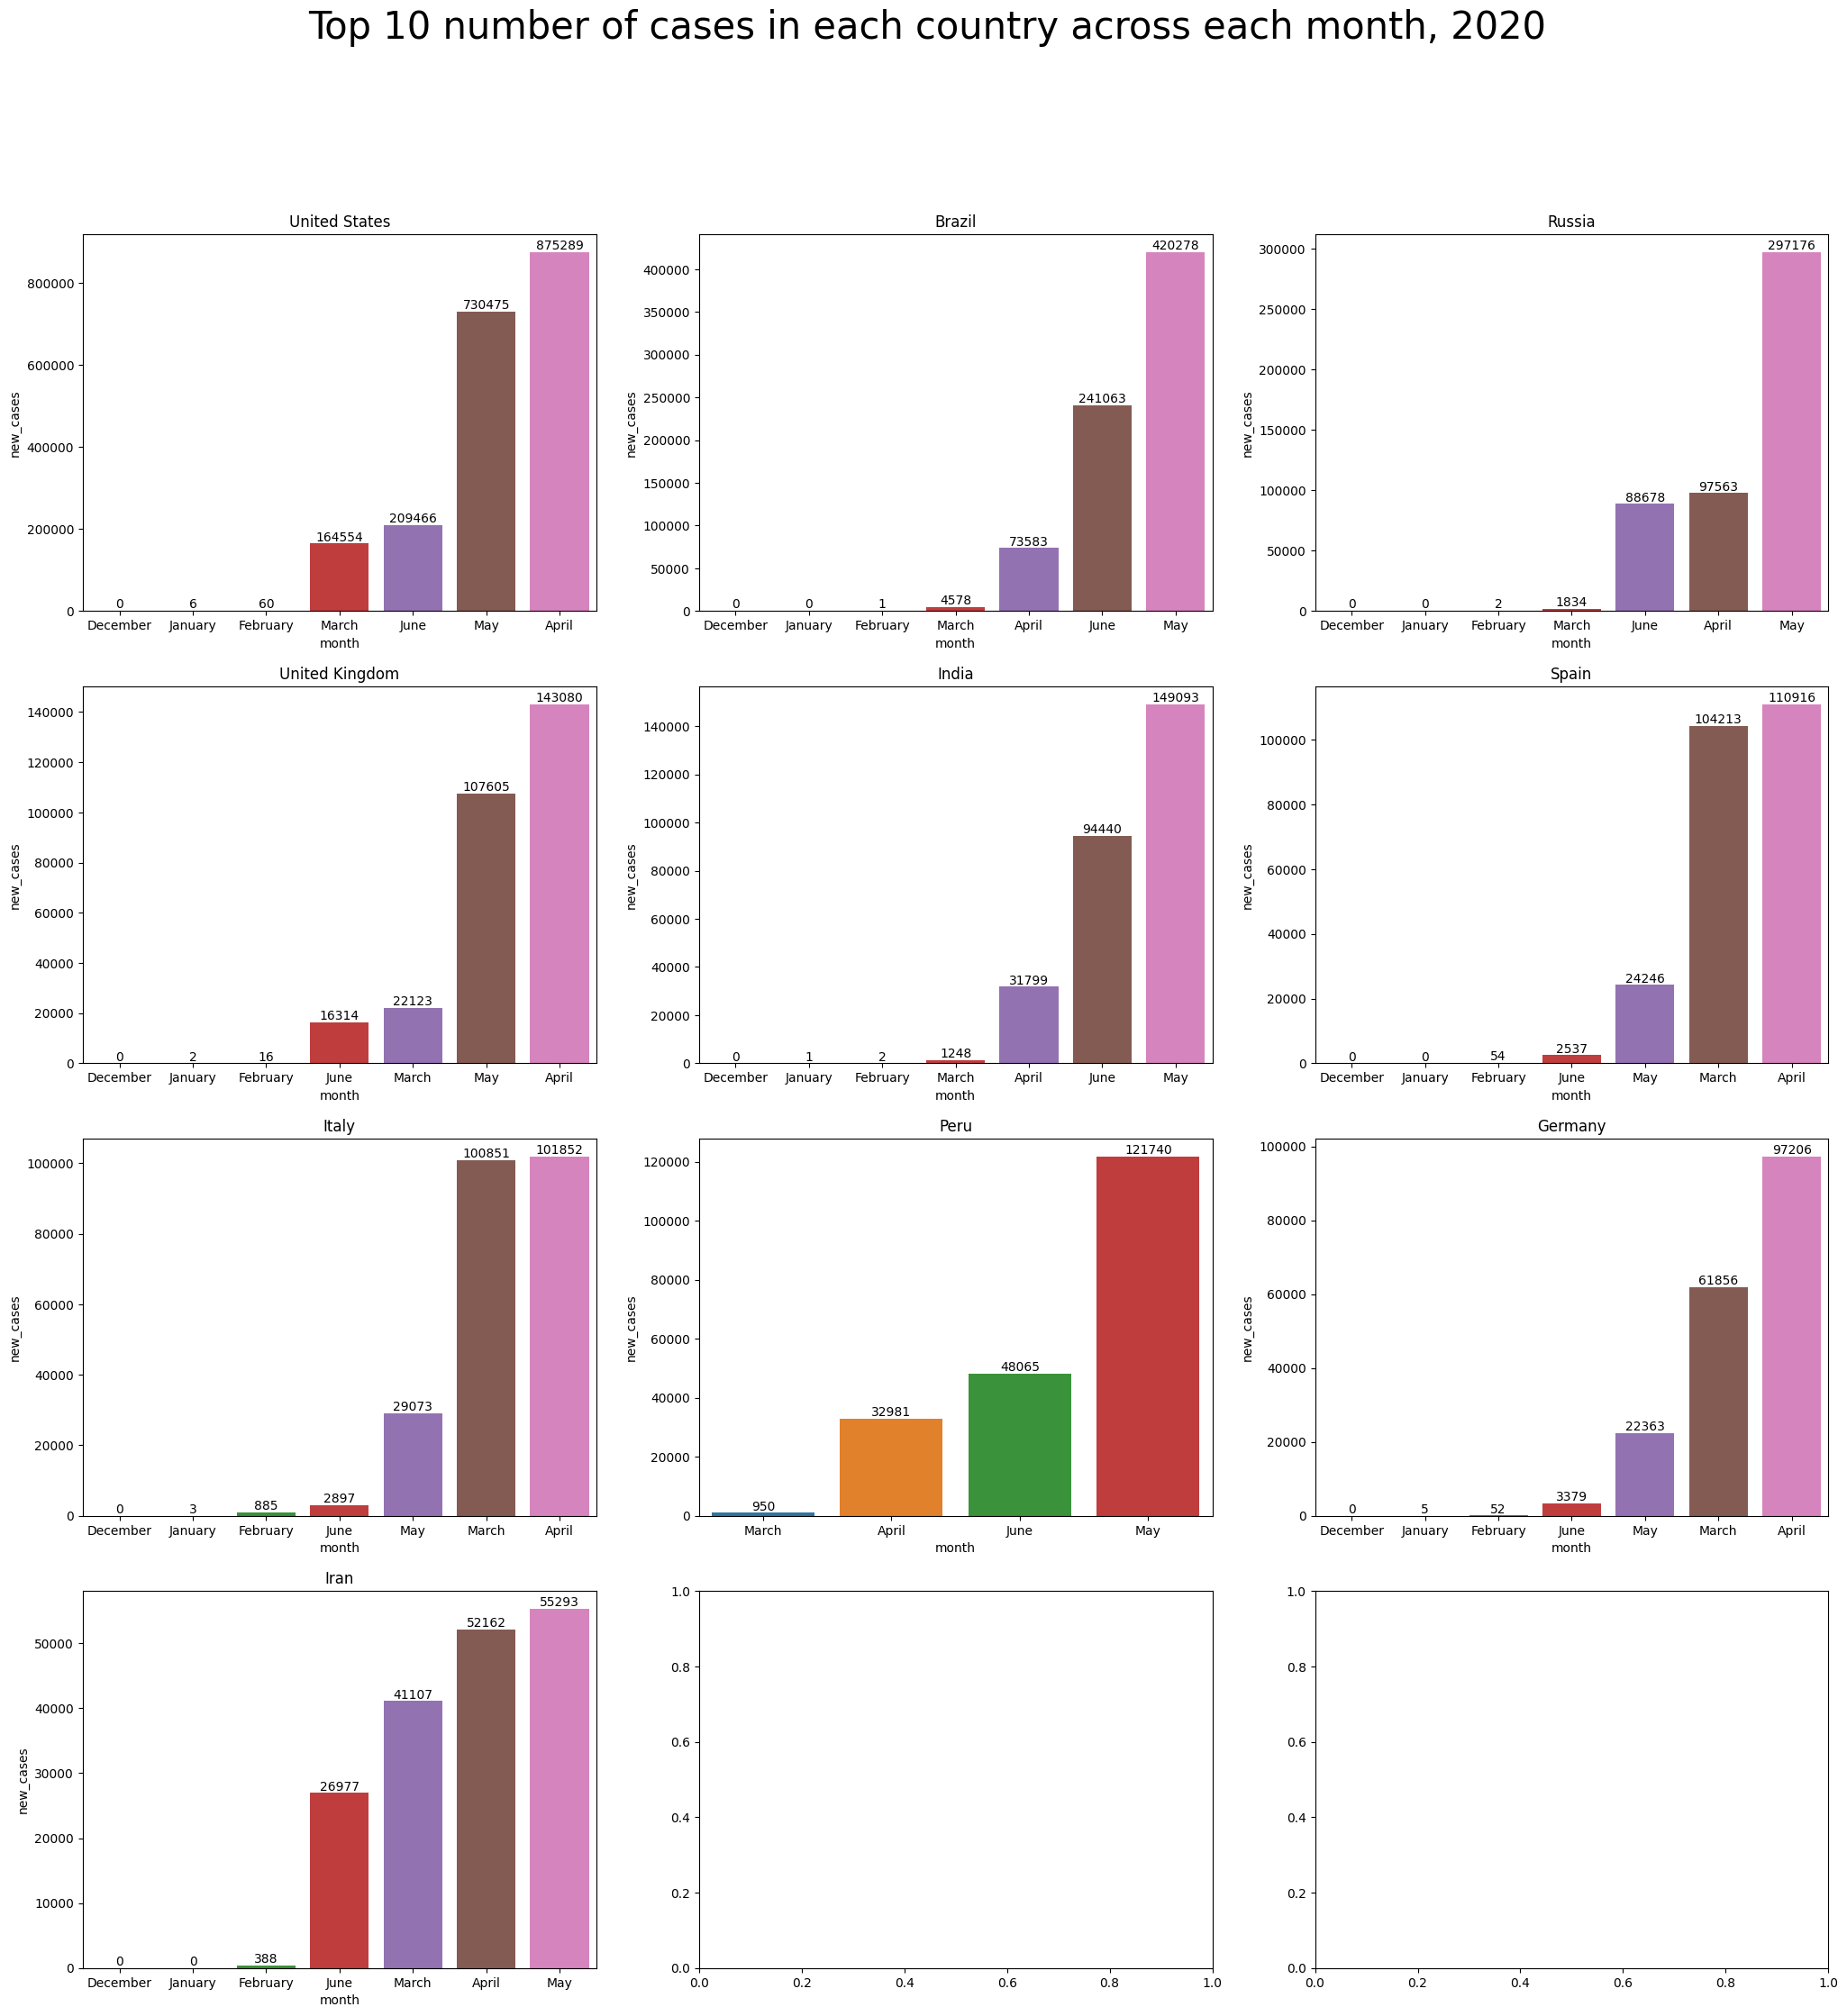

In [12]:
fg, aw =plt.subplots(4,3, figsize=(25,25))
for l in toppie:
    num = toppie.index(l)
    us_ft = df2[df2.location == l].groupby('month')[['new_cases', 'new_deaths']].sum().sort_values(by='new_cases')
    drw = sns.barplot(x=us_ft.index, y=us_ft.new_cases, ax=aw[num//3, num%3])
    aw[num//3, num%3].set_title(l)
    drw.bar_label(drw.containers[0])
fg.suptitle("Top 10 number of cases in each country across each month, 2020", size=30)

Text(0.5, 0.98, 'Top 10 number of deaths in each country across each month, 2020')

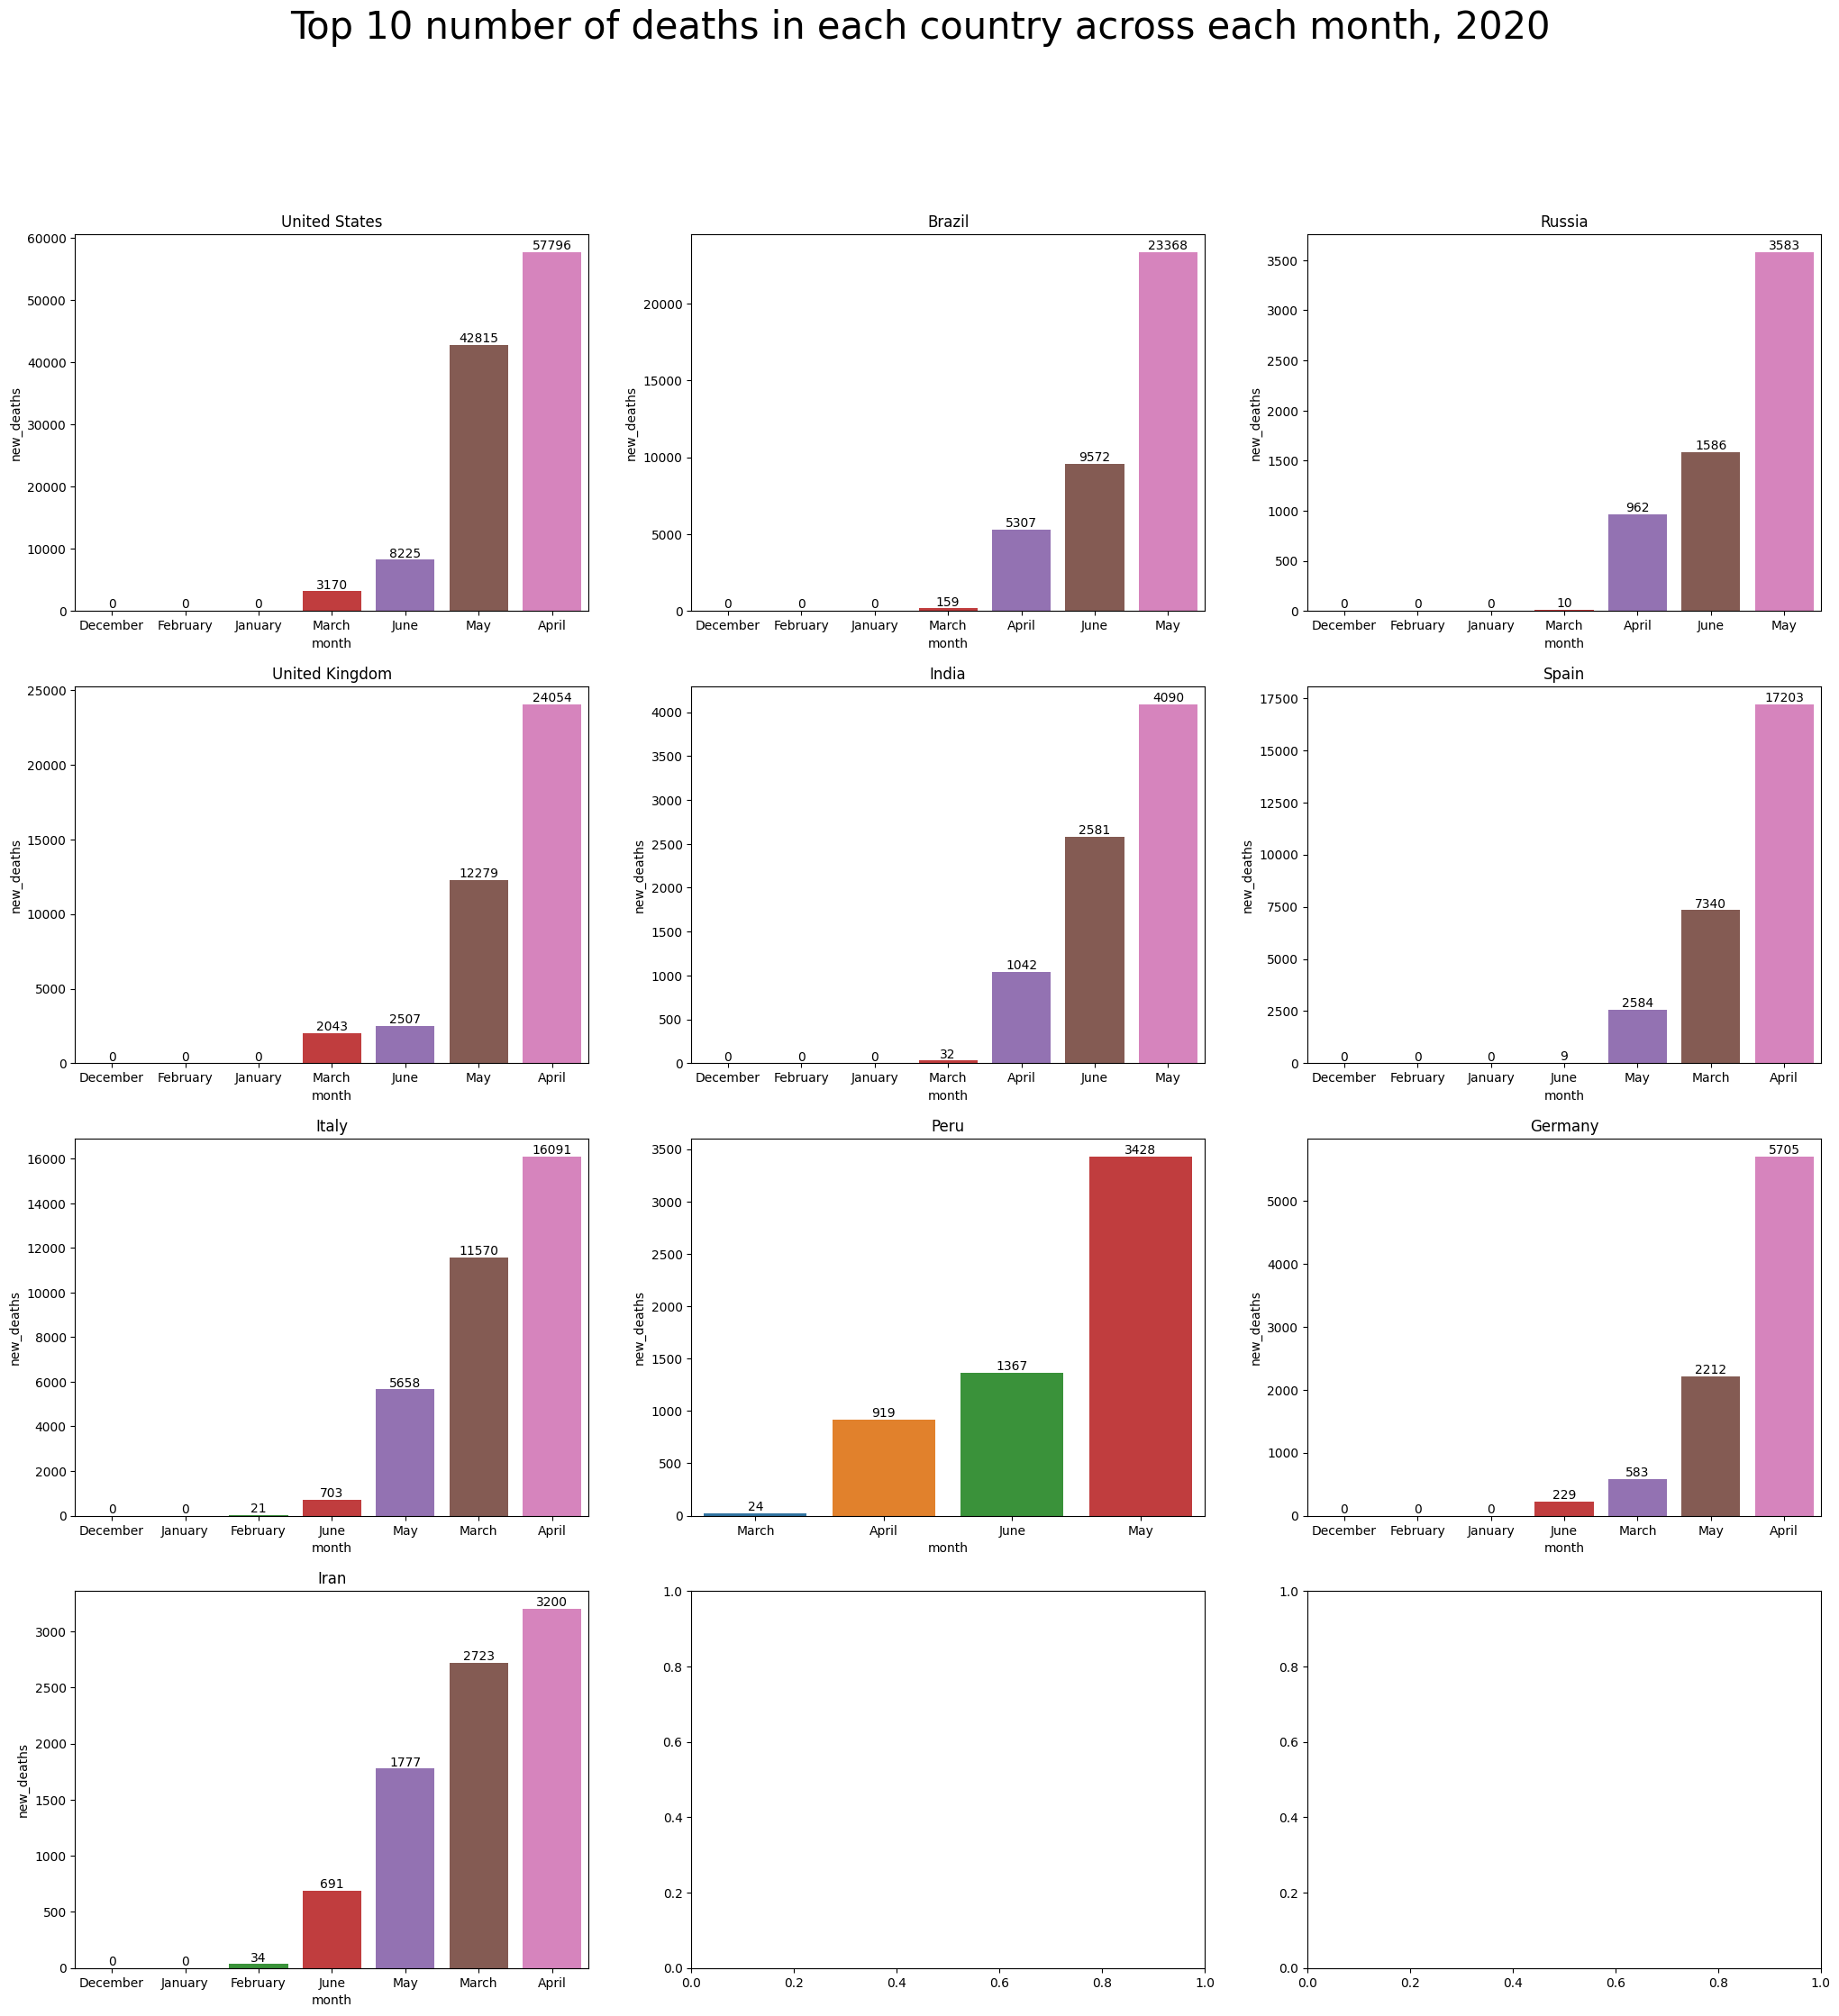

In [13]:
fg, aw =plt.subplots(4,3, figsize=(25,25))

for l in toppie:
    num = toppie.index(l)
    us_ft = df2[df2.location == l].groupby('month')[['new_cases', 'new_deaths']].sum().sort_values(by='new_deaths')
    drw = sns.barplot(x=us_ft.index, y=us_ft.new_deaths, ax=aw[num//3, num%3])
    aw[num//3, num%3].set_title(l)
    drw.bar_label(drw.containers[0])
fg.suptitle("Top 10 number of deaths in each country across each month, 2020", size=30)